<a href="https://colab.research.google.com/github/martinmaturana777/AED-Apuntes/blob/main/Pauta_Auxiliar_4_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Pauta Auxiliar 4: Programación Dinámica y Backtracking.

**Auxiliares: Valentina Alarcón Yañez, Antonia G. Calvo, Cristián Llull, Raimundo Lorca Correa, Samuel Chavéz Fierro<br>
Profesores: Nelson Baloian, Iván Sipirán, Patricio Poblete<br>
Curso: CC3001 Algoritmos y Estructuras de Datos**



# Resumen Programación Dinámica

Algunos problemas hechos con recursividad pueden ser ineficientes, en particular, cuando tienen subproblemas que se repiten y se calculan una y otra vez. La estrategia de _programación dinámica_ incorpora una componente de uso de memoria para almacenar resultados parciales, y con ello, reducir la ineficiencia.

En el apunte se muestra un ejemplo de esto con el caso de _Fibonacci_.

In [ ]:
# Solución recursiva simple de Fibonacci

def fibonacci(n):
    if n<=1:
        return n
    else:
        return fibonacci(n-1)+fibonacci(n-2)

Esta solución es repetitiva e ineficiente, en el sentido de que hay términos que se calculan una y otra vez.

Una primera versión más eficiente usa _memoización_: Utilizar una memoria para almacenar resultados calculados previamente, para evitar recalcularlos. Esto alternativamente se llama 'Memoria caché'.

In [ ]:
def fibonacci(n):
    F=np.zeros(n+1,dtype=int)
    def fib_rec(k):
        if k>0 and F[k]==0: # primera vez que se calcula
            if k<=1:
                F[k]=k
            else:
                F[k]=fib_rec(k-1)+fib_rec(k-2)
        return F[k]
    return fib_rec(n)

La técnica de memoización va llenando el arreglo auxiliar  F  a medida que sus valores son solicitados. Este método es bastante general, pero se puede mejorar si logramos encontrar un orden para ir llenando el arreglo  F  que garantice que cuando se requiere el valor de un cierto casillero, éste ya está llenado. En el caso de Fibonacci, esto se logra simplemente al ir llenando los casilleros $F[k]$ en orden creciente de $k$.
Esta técnica se llama _tabulación_:

In [ ]:
import numpy as np
def fibonacci(n):
    F=np.zeros(n+1,dtype=int)
    F[0]=0
    F[1]=1
    for k in range(2,n+1):
        F[k]=F[k-1]+F[k-2]
    return F[n]

# Resumen Backtracking

Existen situaciones en que no nos queda más que resolver un problema por prueba y error. O sea, debemos revisar una gran parte de las posibles soluciones exhaustivamente. Para esto podemos utilizar recursiones para probar las distintas posibilidades hasta que una funcione, o se acaben.

Ahora, si solo utilizamos recursión entraríamos en bucles infinitos recorriendo los mismos caminos una y otra vez. Por lo tanto backtracking no es solo utilizar recursión. Debemos reconocer qué soluciones ya hemos probado antes, rehacerlas y continuar.

Backtracking es costoso, por lo cual debemos analizar los problemas para determinar que no existen otras técnicas que puedan resolverlo en mejor tiempo.




# Pregunta 1: Programación Dinámica - Distancia de Levenshtein

La distancia de Levenshtein es una medida de la diferencia entre dos cadenas de texto. Se calcula considerando el número mínimo de operaciones (borrar, insertar, sustituir) que se necesitan para transformar una cadena en otra.

Ejemplos:
- La distancia de Levenshtein entre “gato” y “pato” es 1, puesto que solo se requiere cambiar la 'g' por la 'p'.

- La distancia de Levenshtein entre “perro” y “gato” es 4.
  Una respuesta óptima es:
  1. Se sustituye la 'p' de 'perro' por una 'g'.
  2. Se sustituye la 'e' por una 'a'
  3. Se cambia una 'r' por una 't'.
  4. Se elimina la otra 'r'.
  Lo que equivale a realizar 4 operaciones.

La idea de este ejercicio es utilizar programación dinámica para crear una función ``` levenshtein(texto_1, texto_2)``` que calcule la distancia de Levenshtein entre dos cadenas.

Para ello, deberá considerar el uso de una matriz M donde cada casilla M[i][j] represente la distancia de Levenshtein entre los primeros i caracteres de texto_1 y los primeros j caracteres de texto_2.

In [ ]:
def levenshtein(texto_1, texto_2):

    # Primero se arma la matriz M, de tamaño (n+1)x(m+1)
    n = len(texto_1)
    m = len(texto_2)
    # Debe ser '+1' para considerar cadenas vacías como opciones.
    M = np.zeros((n+1, m+1))

    # Se comienza llenando los bordes, que representan casos particulares
    for i in range(n+1):
        M[i][0] = i  # se busca llegar a una cadena vacía: se debe eliminar todo de texto_1 (i caracteres)
    for j in range(m+1):
        M[0][j] = j  # partir de una cadena vacía: se debe insertar todo j

    # De aquí concluimos:
    # - 'Moverse en distintos i' equivale a borrar un caracter
    # - 'Moverse en distintos j' equivale a insertar un caracter

    # Llenar la matriz
    for i in range(1, n+1):
        for j in range(1, m+1):
            if texto_1[i - 1] == texto_2[j - 1]: # Mismo caracter. La distancia se mantiene.
                M[i][j] = M[i - 1][j - 1]
            else: # Caracteres distintos. Se busca la mejor alternativa
                M[i][j] = 1 + min(M[i - 1][j],    # caso donde borramos una letra
                                  M[i][j - 1],    # caso donde insertamos una letra de j
                                  M[i - 1][j - 1]) # sustituir

    print(M)
    return M[n][m] # El resultado óptimo se encuentra en la celda M[n][m]


Ej: Matriz para "perro" y "gato":
 ```
     ''   g   a   t   o
''   0    1   2   3   4
p    1    1   2   3   4
e    2    2   2   3   4
r    3    3   3   3   4
r    4    4   4   4   5
o    5    5   5   5   4  

```

In [ ]:
# Tests

assert levenshtein("pato", "gato") == 1
assert levenshtein("perro", "gato") == 4

[[0. 1. 2. 3. 4.]
 [1. 1. 2. 3. 4.]
 [2. 2. 1. 2. 3.]
 [3. 3. 2. 1. 2.]
 [4. 4. 3. 2. 1.]]
[[0. 1. 2. 3. 4.]
 [1. 1. 2. 3. 4.]
 [2. 2. 2. 3. 4.]
 [3. 3. 3. 3. 4.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 4.]]


# Pregunta 2: Recorrido del caballo de ajedrez



El problema del caballo es un antiguo problema matemático. Se pide que, teniendo una cuadrícula de $n x n$ casillas y un caballo de ajedrez colocado en una posición cualquiera $(x, y)$, el caballo pase por todas las casillas, una sola vez. Es decir, debe realizar $n^2 - 1$ saltos.

- Implemente una solución usando backtracking para el problema del caballo de ajedrez, llamada `resolverCaballo(int: n=8)`. Considere un tablero normal de $8 x 8$ por defecto y que el caballo parte en la posición (0,0) (a1).

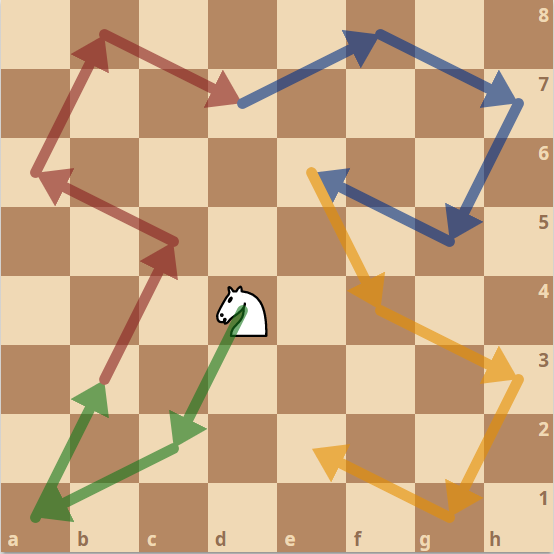

In [ ]:
# Knight Tour (El recorrido del caballo)
# El algoritmo implementado corresponde a backtracking,
# de tal manera de ir incrementando la solución hasta encontrar un camino que satisfaga el recorrido del caballo.

# Método para imprimir la matriz
def imprimir_matriz(m):
    for fila in m:
        print("\t".join(str(casilla) for casilla in fila))

N = 8  # tamaño del tablero
tablero = np.zeros((N,N), dtype=int)  # matriz que representa el tablero

# Método principal que gatilla la resolución del problema
def resolver_caballo():
    for i in range(N):
        for j in range(N):
            tablero[i][j] = -1  # porque -1 significa que no se ha visitado esta casilla

    if existe_solucion(0, 0, 0):
        imprimir_matriz(tablero)
        return True
    return False  # no hay solución

# Verificar si existe una solución
def existe_solucion(i, j, paso):
    # Si ya se recorrió el tablero completo, se logró el objetivo
    if paso == N * N:
        return True

    # No puede haber solución pasando por fuera del tablero
    if i >= N or j >= N or i < 0 or j < 0:
        return False

    # Si la posición consultada ya fue visitada, entonces no hay solución
    if tablero[i][j] != -1:
        return False

    # Marcar casilla con el número de la posición
    tablero[i][j] = paso

    # Probar las diferentes posibilidades desde la dirección actual
    if existe_solucion(i+1, j+2, paso+1):  # 1 hacia abajo, 2 a la derecha
        return True
    if existe_solucion(i+2, j+1, paso+1):  # 2 hacia abajo, 1 a la derecha
        return True
    if existe_solucion(i+2, j-1, paso+1):  # 2 hacia abajo, 1 a la izquierda
        return True
    if existe_solucion(i+1, j-2, paso+1):  # 1 hacia abajo, 2 a la izquierda
        return True
    if existe_solucion(i-1, j-2, paso+1):  # 1 hacia arriba, 2 a la izquierda
        return True
    if existe_solucion(i-2, j-1, paso+1):  # 2 hacia arriba, 1 a la izquierda
        return True
    if existe_solucion(i-2, j+1, paso+1):  # 2 hacia arriba, 1 a la derecha
        return True
    if existe_solucion(i-1, j+2, paso+1):  # 1 hacia arriba, 2 a la derecha
        return True

    # Si llega a este punto, ninguna opción era posible desde esta posición
    tablero[i][j] = -1  # sacar el caballo de esta posición
    return False

resolver_caballo()


0	37	58	35	42	47	56	51
59	34	1	48	57	50	43	46
38	31	36	41	2	45	52	55
33	60	39	26	49	54	3	44
30	9	32	61	40	25	22	53
17	62	27	10	23	20	13	4
8	29	18	15	6	11	24	21
63	16	7	28	19	14	5	12


True

# Pregunta Propuesta : Cookie Monster

Usted luego de levantarse a las 3AM decide conseguir un refrigerio de media noche. Para eso usted va a su cocina, donde ve convenientemente una fila de galletas de distinto peso, $g_0, g_1, g_2, ..., g_n$. Usted, recordando el auxiliar, quiere tener un problema de algoritmo avaro, y se propone que no debe escoger galletas contiguas, ¿Cuál sería el mejor algoritmo para poder maximizar su refrigerio de noche?

a) Modele la situación, analice y preste atención a los casos base en donde usted puede que encuentre una galleta, dos o ninguna.

b) Programe su algoritmo en Python, implementando programación dinámica, y encuentre la mejor elección de galletas para su comida de media noche.


Respuesta a)

Buscamos una expresión $F(k)$ que represente la máxima cantidad de galletas que se puede recoger con las primeras k galletas de valores $c_1, c_2, ..., c_k$ respectivamente. Para la k-ésima galleta hay solo dos casos posibles: Tomar la k-ésima galleta o no tomarla.

Si no tomamos la galleta $k$, el máximo valor que podemos obtener con las primeras $k$ galletas es el mismo que podemos obtener con las primeras $k-1$. Entonces, para este caso se tiene que $F(k) = F(k-1)$.

Si tomamos la galleta $k$, el máximo valor que podemos obtener es $c_k$ más el máximo valor que podemos obtener con las galletas anteriores. Como no podemos tomar dos galletas seguidas, la galleta $k-1$ no puede ser considerada dentro del óptimo, entonces el máximo valor que podemos obtener con las galletas anteriores es $F(k-2)$ y por lo tanto el máximo valor que podemos obtener con las primeras $k$ galletas es $c_k + F(k-2)$, es decir, $F(k) = c_k + F(k-2)$ para este caso.

Para finalizar, nos interesa tomar el caso que nos entregue un valor mayor, que la expresión $F(k)$ es de la siguiente forma:

$$
F(k) = max
\begin{cases}
F(k-1)\\
c_k + F(k-2)
\end{cases} \forall k \geq 2
$$

Sabemos que $k$ corresponde al número de galletas que tenemos en consideración, entonces $F(0) = 0$, ya que sin galletas no tenemos gramos. Siguiendo la misma lógica, $F(1) = c_1$, porque la cantidad de galletas óptima que podemos obtener con una galleta es el valor de esta galleta.

Respuesta b)

In [ ]:
# c corresponde a una lista con los gramos de cada galleta
def refrigerio_optimo(c):
  n = len(c)
  F = np.zeros(n+1, dtype = int)

  for k in range(n+1):
    if k == 0:
      F[k] = 0
    elif k == 1:
      F[k] = c[k-1]
    else:
      F[k] = max(F[k-1], c[k-1] + F[k-2])

  return F[n]

In [ ]:
galletas_1 = [1, 4, 3, 6, 2, 5, 6, 7]
galletas_2 = [0, 0, 0, 0, 1, 0, 0, 0]
galletas_3 = [0, 0, 0, 0]
galletas_4 = [4, 2, 6, 1, 99, 34, 56, 2, 7, 1]
print("Éxito en galletas_1" if galletas_optimas(galletas_1) == 22 else "Error en galletas_1")
print("Éxito en galletas_2" if galletas_optimas(galletas_2) == 1 else "Error en galletas_2")
print("Éxito en galletas_3" if galletas_optimas(galletas_3) == 0 else "Error en galletas_3")
print("Éxito en galletas_4" if galletas_optimas(galletas_4) == 172 else "Error en galletas_4")